In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [2]:
run main_CPS2019

<IPython.core.display.Javascript object>


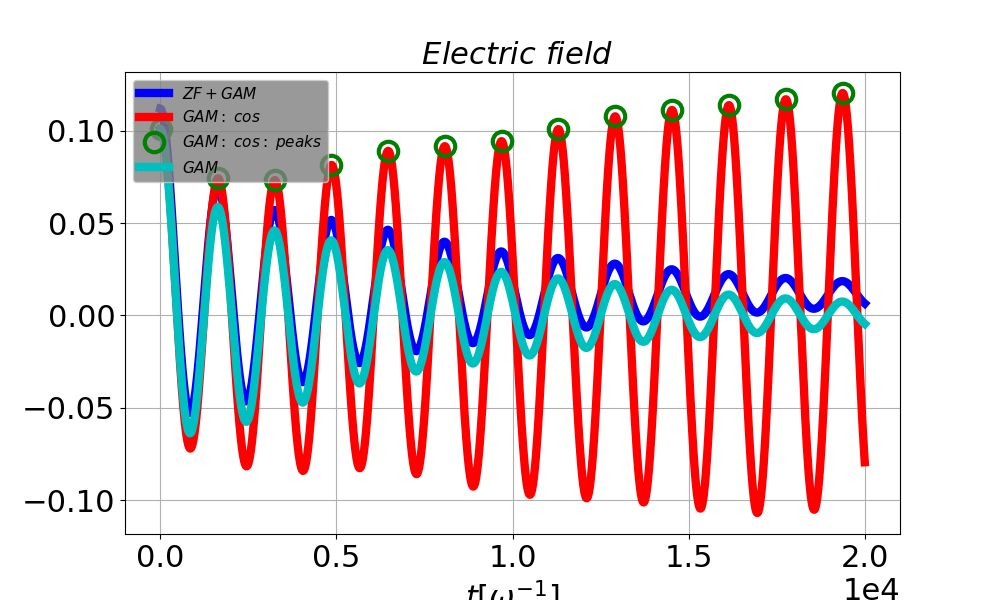

<IPython.core.display.Javascript object>


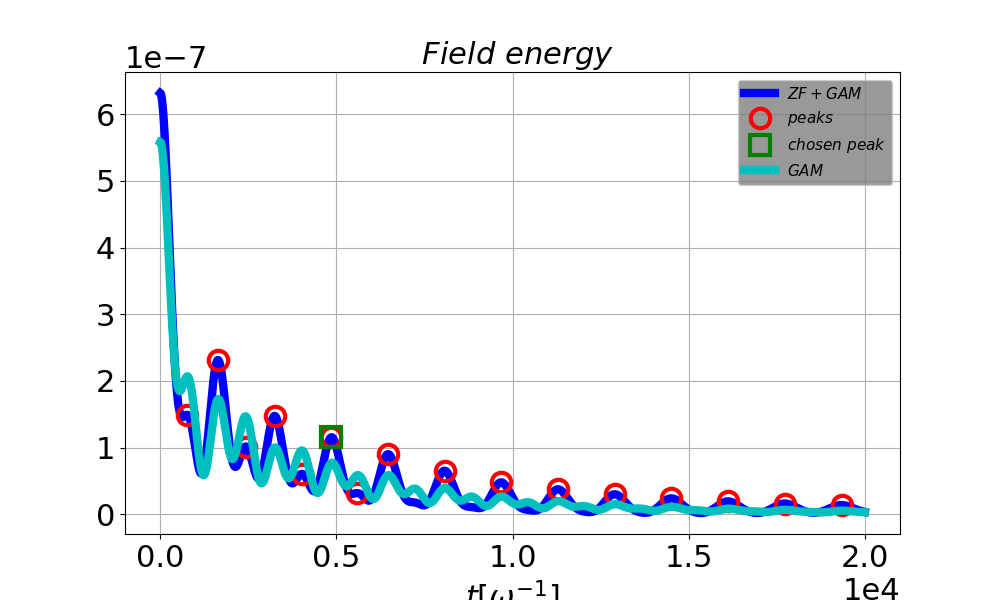

<IPython.core.display.Javascript object>


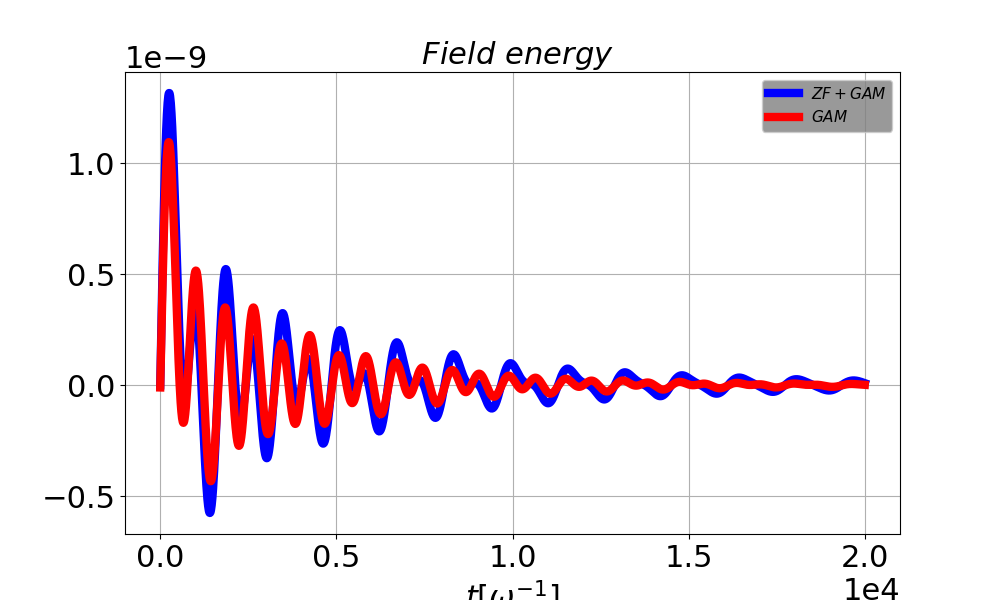

In [130]:
# *************************
# *** MPR: PLOT 1D DATA ***
# *************************
reload()

common.MPR_plot_1d(dd_gam, {})

<IPython.core.display.Javascript object>


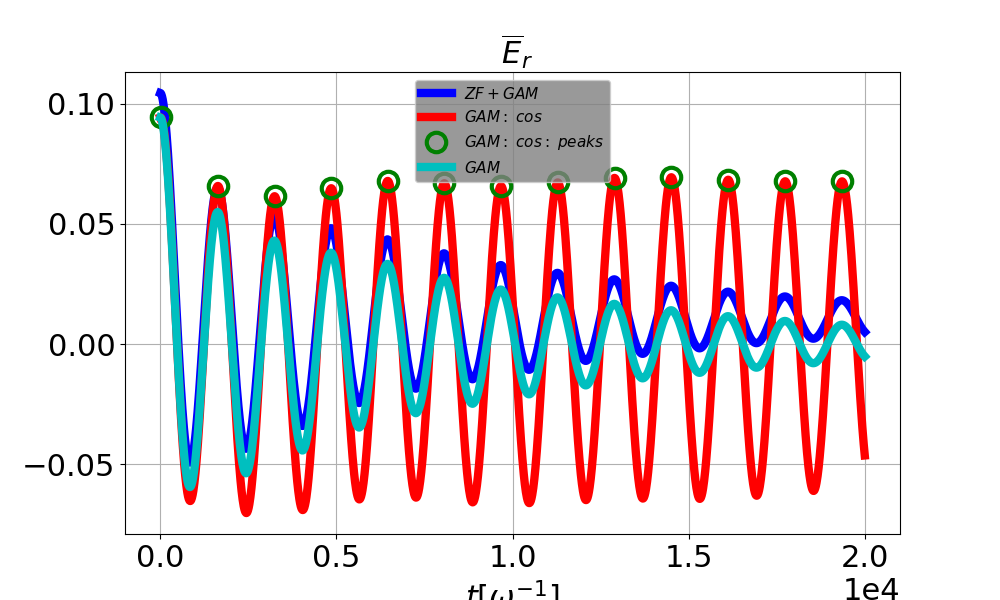

<IPython.core.display.Javascript object>


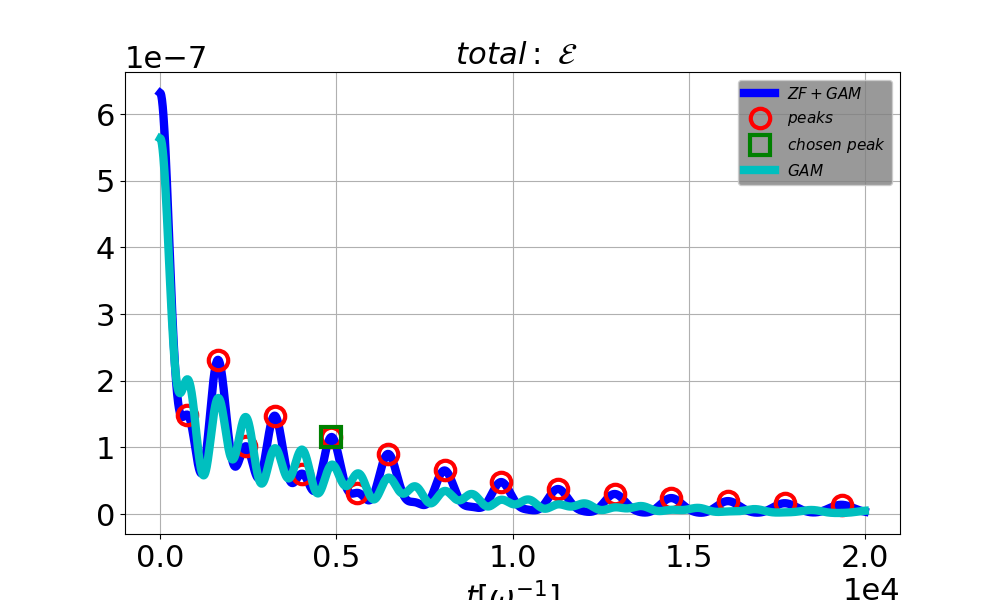

<IPython.core.display.Javascript object>


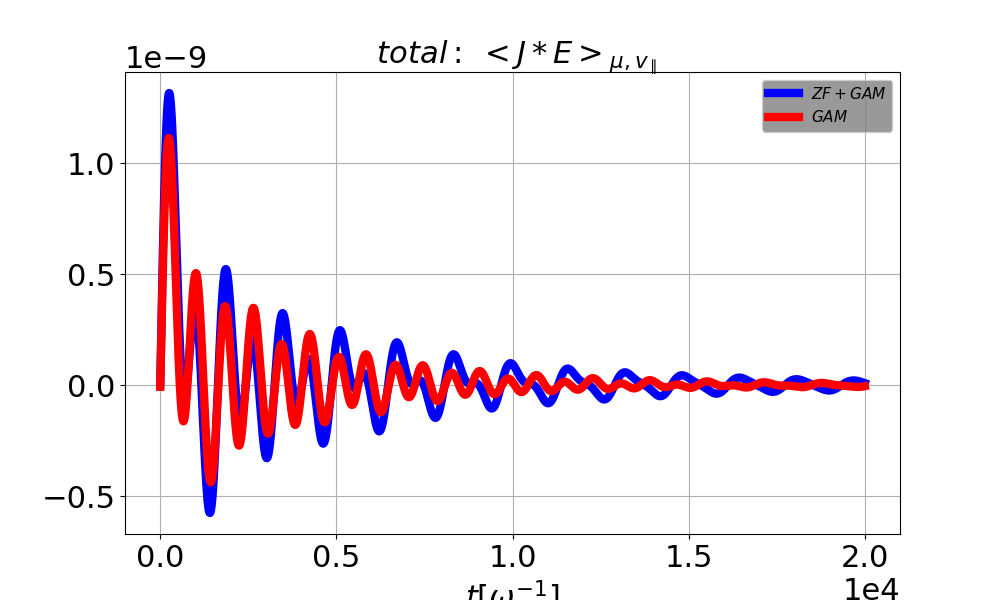

<IPython.core.display.Javascript object>


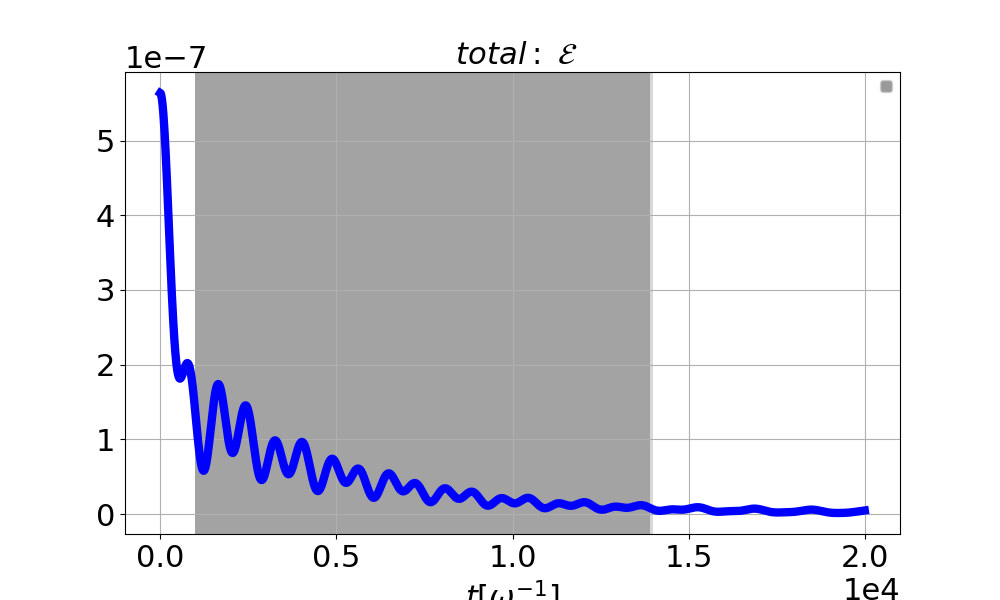

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


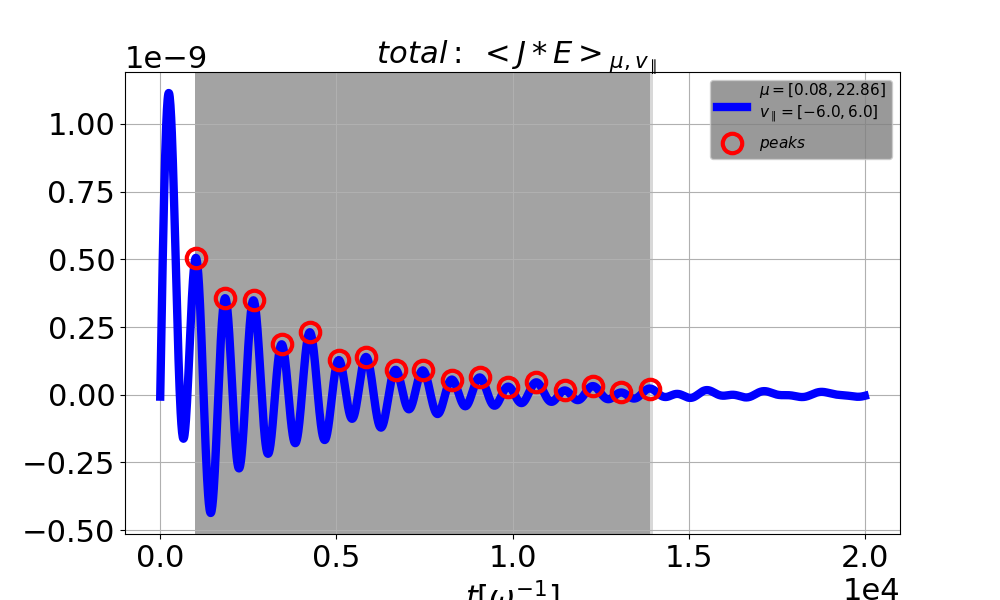

All chosen time intervals are unique.


<IPython.core.display.Javascript object>


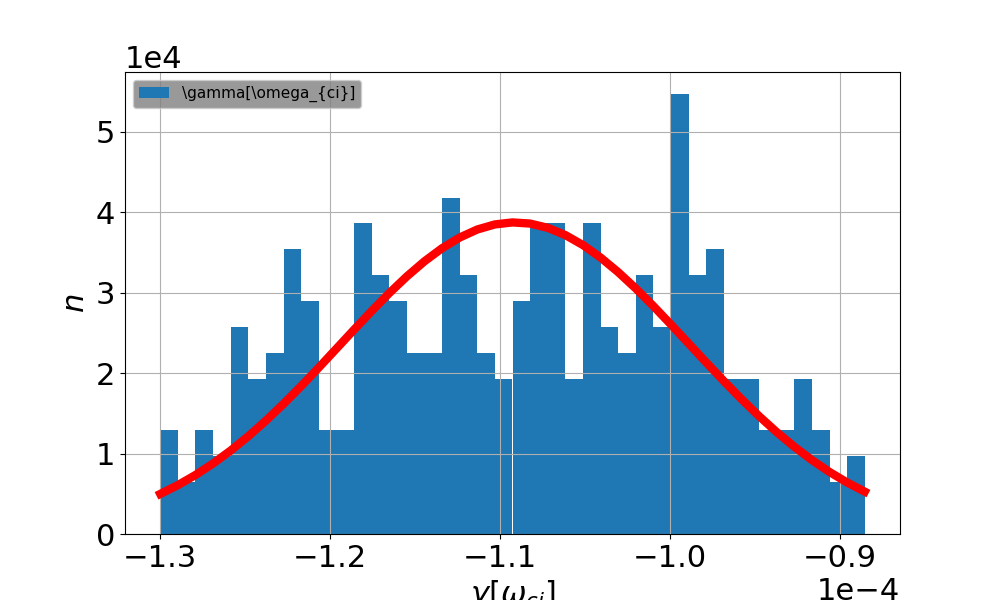

total: Initial: g[wci] = -1.072e-04
total: Statistics: g[wci] = -1.091e-04+-2.018e-05
OLD confidence interval (3*sigma) = 3.089e-05


In [7]:
# ***********************
# *** MPR: FIND GAMMA ***
# ***********************
reload()


# TEST: g = -1.288e-04, ngam = 5.002876, t1 = 1.680e+03, t2 = 9.740e+03

oo_vars = {
    'sel_species': 'total',
    'mu_domain': [],
    'vpar_domain': [], 
    'smoothing': {},
}

oo_wg = {
    # work and calcualtion time domain
    't_work': [1e3, 9e2, 1.4e4], # only first and last elements matter
    'flag_naive_t_peaks': False,
    'naive_n_periods': 8,
    # To exclude ZFZF deom J*E and Efield
    'flag_ZFZF': True,
    'gam-s1': 0.74,
    'zfzf-t1': 1.5e4,
    'gam-w': 3.9e-3,
    'gam-g': -1.1e-4,
    'id-efield-peak': 4,
    # vary right boundary
    'flag_t_right': False,
    'right-n': 300,
    # calculate confidence intervals
    'flag_stat': True,
    'n_samples': 300,
    'min_gam_n_periods': 4,
}

oo_plot = {
    't_plot': []
}

common.MPR_gamma(dd_gam, oo_vars, oo_wg, oo_plot)

<IPython.core.display.Javascript object>


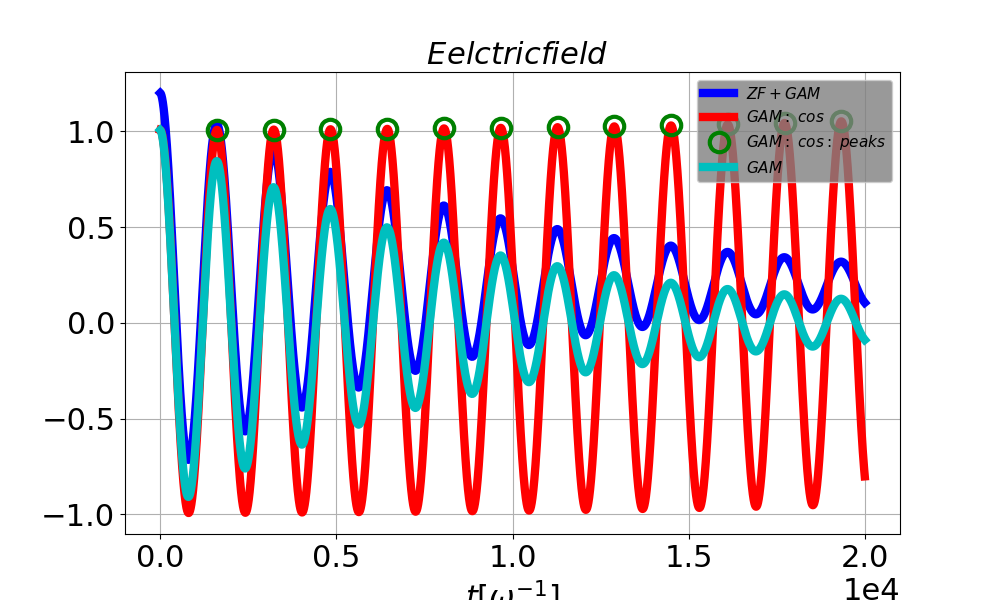

<IPython.core.display.Javascript object>


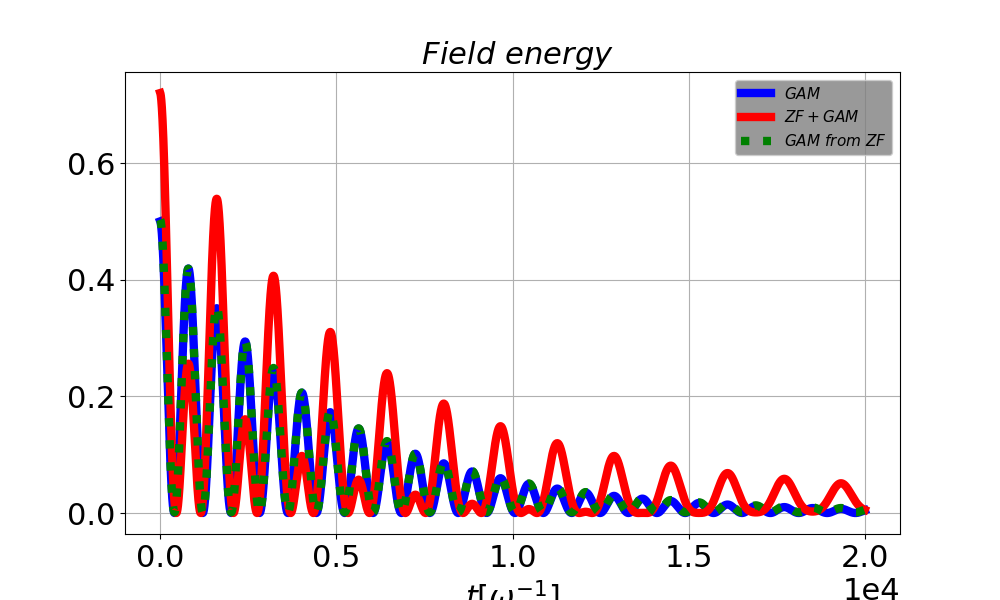

In [65]:
# ********************************************************
# *** TEST: Eliminate contribution of ZFZF from Efield ***
# ********************************************************
reload()
common.MPR_test_gam_zf()

<IPython.core.display.Javascript object>


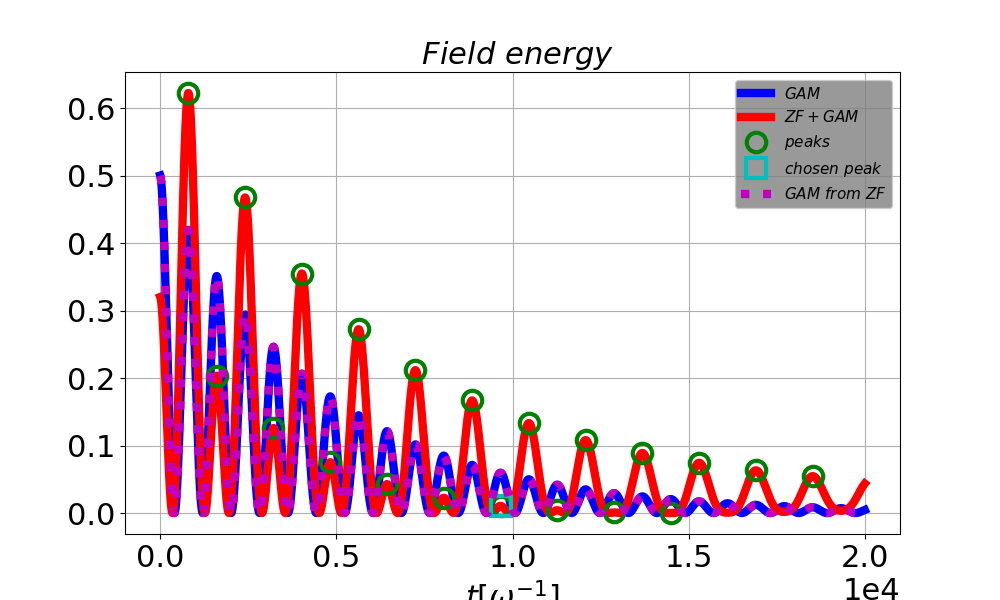

In [113]:
# ********************************************************
# *** TEST: Eliminate contribution of ZFZF from Efield ***
# ********************************************************
reload()
common.MPR_test_gam_zf_efield()

In [ ]:
reload()

s = 0.74
q = 1.5
tau_e = 1
elong = 1
kr_pert = 2

a0 = dd_gam['a0']
B0 = dd_gam['B0']
Lx = dd_gam['Lx']
mf = dd_gam['pf'].mass
Zf = dd_gam['pf'].Z

wc = dd_gam['wc']
R0 = dd_gam['R0']

sfmin = 0.5
sfmax = 1
Lwork = (sfmax - sfmin) * a0

Te = ymath.find_Te(Lx, a0, B0, mf, Zf)
Ti = Te*1/tau_e

rho_star = 2 / Lx
Lx_check = ymath.find_Lx(a0, Te, B0, mf, Zf)

khat = ymath.find_k(kr_pert, Ti, B0, Lwork, mf, Zf)

vti = np.sqrt(Ti/mf)

In [ ]:
import gam_theory

th_wg = gam_theory.omegagamma_GAM(q, tau_e, khat, elong)

norm_vti = np.sqrt(2) * vti / R0
SW_w = th_wg['SW-w'] * norm_vti / wc
SW_g = th_wg['SW-g'] * norm_vti / wc
Gao_w = th_wg['Gao-w'] * norm_vti / wc
Gao_g = th_wg['Gao-g'] * norm_vti / wc


line_sw_w = 'SW: w[wci] = {:0.3e}'.format(SW_w)
line_sw_g = 'SW: g[wci] = {:0.3e}'.format(SW_g)
line_gao_w = 'Gao: w[wci] = {:0.3e}'.format(Gao_w)
line_gao_g = 'Gao: g[wci] = {:0.3e}'.format(Gao_g)
print(line_sw_w)
print(line_sw_g)
print(line_gao_w)
print(line_gao_g)

In [ ]:
from scipy import constants
Te / constants.elementary_charge